In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scikit to split data into test and train
from sklearn.model_selection import train_test_split, cross_val_score
#for label encoding
from sklearn.preprocessing import LabelEncoder
#for model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset
dataset = pd.read_csv("/content/drive/MyDrive/MobiAct_Dataset_v2.0/output_/output.csv")
dataset.head(1)

,timestamp,rel_time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,3139004341000,0.0,-0.940165,9.595961,-2.358001,-1.10139,0.503658,0.100793,224.67455,-93.556175,1.853466,STD


In [ ]:
#deleting irrelevent column
data = dataset.drop(['rel_time'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16815606 entries, 0 to 16815605
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   acc_x      float64
 2   acc_y      float64
 3   acc_z      float64
 4   gyro_x     float64
 5   gyro_y     float64
 6   gyro_z     float64
 7   azimuth    float64
 8   pitch      float64
 9   roll       float64
 10  label      object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ GB


### label type object to float

In [ ]:
data["label"].value_counts()

STD    4938895
WAL    4909529
SIT    1178927
JUM    1176407
JOG    1158490
LYI    1007136
STU     656272
STN     602789
CSO     313397
CSI     295789
SCH     161803
BSC     108918
SDL      93992
FKL      88614
FOL      78960
CHU      45688
Name: label, dtype: int64

In [ ]:
order_label= {"STD":0, "WAL":0, "SIT":0, "JUM":0, "JOG":0, "LYI":0, "STU":0, "STN":0, "CSO":0, "CSI":0, "SCH":0, "BSC":1, "SDL":1, "FKL":1, "FOL":1, "CHU":0}

In [ ]:
data["label"] = data["label"].map(order_label)

In [ ]:
data.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,3139004341000,-0.940165,9.595961,-2.358001,-1.101390,0.503658,0.100793,224.67455,-93.556175,1.853466,0
1,3139009320000,-0.943494,9.595961,-2.362280,-0.974635,0.419054,0.102625,224.54541,-93.389540,1.817058,0
2,3139014499000,-0.946956,9.595961,-2.366732,-0.841161,0.348804,0.090408,224.40395,-93.258995,1.794242,0
3,3139019518000,-0.950312,9.595961,-2.371046,-0.710131,0.311847,0.091019,224.27795,-93.163280,1.773880,0
4,3139024657000,-0.953748,9.595961,-2.375464,-0.587347,0.212276,0.043066,224.18959,-93.089200,1.733693,0


### Data Cleaning

In [ ]:
#to check missing value
data.isnull().sum()
#there is no missing value in dataset

timestamp    0
acc_x        0
acc_y        0
acc_z        0
gyro_x       0
gyro_y       0
gyro_z       0
azimuth      0
pitch        0
roll         0
label        0
dtype: int64

### Train Test Spliting

In [ ]:
#split dataset into independent "X" and dependent variables "y"
X = data.drop("label", axis=1)
Y = data["label"]
#to know the shape of data
print("shape of X =", X.shape)
print("shape of y =", Y.shape)

shape of X = (16815606, 10)
shape of y = (16815606,)


In [ ]:
#spliting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print("shape of X_train =", X_train.shape)
print("shape of X_test =", X_test.shape)
print("shape of y_train =", Y_train.shape)
print("shape of y_test =", Y_test.shape)

shape of X_train = (11770924, 10)
shape of X_test = (5044682, 10)
shape of y_train = (11770924,)
shape of y_test = (5044682,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


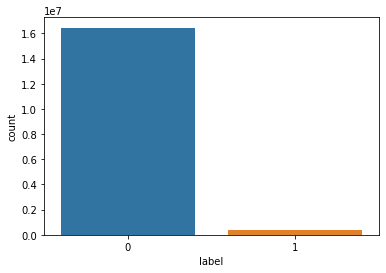

In [ ]:
sns.countplot(data["label"])

### Model building

Decesion tree

In [ ]:
classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train, Y_train)
Y_pred_dt=classifier_entropy.predict(X_test)
accuracy_score(Y_test, Y_pred_dt)

0.9965052306567589

### Confusion matrix

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_dt)

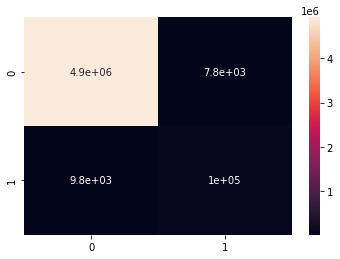

<Figure size 1440x648 with 0 Axes>

In [ ]:
sns.heatmap(cm, annot = True)
plt.figure(figsize=( 20,9))
plt.show()

### Classification report of model

In [ ]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4933612
           1       0.93      0.91      0.92    111070

    accuracy                           1.00   5044682
   macro avg       0.96      0.96      0.96   5044682
weighted avg       1.00      1.00      1.00   5044682



### Cross validation

In [ ]:
cross_val = cross_val_score(estimator= classifier_entropy, X=X_train, y=Y_train, cv=10)

In [ ]:
print("cross validation accuracy = ", cross_val )

cross validation accuracy =  [0.99621865 0.99636307 0.99617702 0.99634693 0.99615918 0.99618467
 0.99600626 0.99612944 0.99619996 0.9962127 ]


In [ ]:
print("cross validation mean accuracy = ", cross_val.mean())

cross validation mean accuracy =  0.9961997885377116


### Save the model

In [ ]:
import pickle
# save model
pickle.dump(classifier_entropy, open('fall_model.pkl', 'wb'))

# load model
fall_model = pickle.load(open('fall_model.pkl', 'rb'))